# Α.Στοιχεία Ομάδας

#      Ομάδα Α5

   Ορφανουδάκης Φίλιππος (ΑΜ:03113140)

   Μπακούρος Αριστείδης (ΑΜ:03113138)

# Β.Εισαγωγή του Dataset

Το συγκεκριμένο dataset(ISOLET) προήλθε με τον εξής τρόπο: 150 άνθρωποι (αντικείμενα του δείγματος) κλήθηκαν να πουν κάθε γράμμα της αγγλικής αλφαβήτου από 2 φορές. Έτσι, για κάθε αντικείμενο έχουμε 52 (26 γράμματα επί 2 φορές την αλφαβήτα ο καθένας) rows στο dataset μας και 617 attributes συν 1 για την κλάση. Οι κλάσεις παίρνουν τιμές από 1 ως και το 26 και αντιπροσωπεύουν ένα γράμμα της αλφαβήτου(1 για το A, 2 για το B, 3 για το C κ.ο.κ). Αρχικά ήταν χωρισμένοι σε 5 ομάδες των 30 αντικειμένων, η τελευταία ομάδα ήταν το test set, αλλά το αλλάζουμε στη συνέχεια καθώς η άσκηση ζητά 30% test set. Τα attributes αφορούν στοιχεία του γύρω περιβάλλοντος καθώς και ηχητικά χαραχτηριστικά πριν, μετά και κατά τη διάρκεια της προφοράς κάθε γράμματος. Στόχος είναι να προβλεφθεί με όσο το δυνατόν μεγαλύτερη συνέπεια ποιο πράγμα πρόκειται να ειπωθεί βάσει όλων αυτών των χαραχτηριστικών. Δεν υπάρχουν απουσιάζουσες τιμές, έχουν χαθεί μόνο 3 παραδείγματα πιθανώς για προβλήματα στην ηχογράφηση και όλα τα χαραχτηριστικά είναι διατεταγμένα και είναι πραγματικοί αριθμοί από το -1 έως το 1.


Ξεκινάμε κάνοντας upgrade τις βιβλιοθήκες που θα χρειαστούμε.

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.20.1)
Requirement already up-to-date: numpy in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (1.15.4)
Requirement already up-to-date: pandas in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.23.4)


Για να εισάγουμε το dataset μας κατεβάζουμε τα αρχεία isolet1+2+3+4.data και isolet5.data και τα ανεβάζουμε στο ιδιο directory με αυτό το notebook.

In [2]:
!ls

1.1_Classification.ipynb	   Lab 6 Clustering exercise solution.ipynb
1.2_Pima_Indians_exercise_A.ipynb  Lab 6 Clustering.ipynb
1.3_Classification.ipynb	   Lab 7 Text mining exercise.ipynb
2.0 Classification.ipynb	   Lab_7_Text_Mining.ipynb
2.1_Classification.ipynb	   mydoc.txt
askhsh1_small-Copy.ipynb	   pythoncode.py
askhsh1_small.ipynb		   sample.csv
askhsh1_task_small.ipynb	   Small.ipynb
Classification_3.ipynb		   Solution_1.2_Pima_Indians_exercise_Á.ipynb
crx.data			   SOM_with_Somoclu.ipynb
doc.txt				   task1clone.ipynb
example.csv			   task1.ipynb
final1.2.ipynb			   task_big.ipynb
gobig.ipynb			   task.ipynb
hepatitis.data			   task_small.ipynb
isolet1.data			   tmp
isolet5.data			   Untitled.ipynb
Lab_2_Notebooks_intro.ipynb	   wdbc.data
Lab_2_Python_Intro.ipynb	   wdbc.names
Lab_6_Clustering_exercise.ipynb    wpbc.data


Ακολουθεί μία πρώτη εμφάνιση των 2 αυτών datasets προτού γίνει το concatenation.Επειδή περιέχεται πληροφορία στην 1η γραμμή διαπιστώνουμε ότι δεν έχουμε headers.

In [3]:
import pandas as pd

df = pd.read_csv("isolet1.data", header=None,na_values = ["?"])
df

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0
5,-0.4634,0.0306,0.3546,0.4448,-0.1022,-0.4184,-0.6388,-0.4370,-0.4396,-0.6654,...,0.6626,0.7350,0.3734,0.6626,0.3012,0.1808,0.2290,0.6144,0.3254,3.0
6,-0.3364,-0.0102,0.2132,0.2018,-0.6146,-0.8380,-0.8130,-0.7240,-0.8062,-0.8996,...,0.0526,-0.0702,-0.0350,0.0702,0.1578,0.1930,0.4562,0.4562,-0.3860,4.0
7,-0.4798,-0.1580,0.1764,0.1820,-0.6378,-0.8400,-0.7280,-0.6654,-0.7978,-0.7904,...,0.2912,-0.1646,0.1140,0.0126,-0.0380,0.0886,0.2912,0.3670,0.1646,4.0
8,-0.3928,0.0424,0.2166,0.2124,-0.4564,-0.6200,-0.7112,-0.6602,-0.6942,-0.7920,...,0.8868,0.8868,0.6792,0.6038,0.2264,0.7924,1.0000,0.9246,0.5284,5.0
9,-0.5494,-0.0940,0.2868,0.2964,-0.5326,-0.7204,-0.7518,-0.7398,-0.8482,-0.8386,...,0.6130,0.6130,0.6130,0.3226,0.6130,0.2904,0.5484,0.5162,0.3548,5.0


In [4]:
df = pd.read_csv("isolet5.data", header=None,na_values = ["?"])
df

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,617
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0
5,-0.3212,0.6242,0.6424,0.6666,0.5090,0.1454,0.0060,-0.1454,-0.2606,-0.1940,...,0.4528,0.3584,0.4906,0.2830,0.3584,0.6792,0.3018,0.1698,-0.2642,3.0
6,-0.1312,0.5178,0.5752,0.6754,0.2984,-0.1694,-0.1980,-0.2028,-0.4510,-0.5418,...,0.1314,0.0708,0.0708,0.2930,0.0910,0.1516,-0.0506,-0.0910,-0.7778,4.0
7,0.0090,0.7374,0.6298,0.5820,0.1880,-0.0806,-0.2836,-0.5284,-0.5164,-0.7612,...,-0.1428,0.0990,0.1868,0.4506,0.4726,0.2528,-0.0330,-0.1868,-0.8022,4.0
8,-0.4392,0.5782,0.6426,0.4094,-0.1762,-0.3896,-0.3846,-0.3548,-0.7022,-0.7072,...,0.6000,-0.1810,0.1428,0.2952,0.2380,0.2000,0.2000,0.0096,-0.7714,5.0
9,-0.3154,0.1868,0.2614,0.3776,0.0912,-0.1660,-0.4854,-0.4772,-0.4440,-0.5186,...,0.3138,0.2550,0.2942,0.5294,0.0196,0.1176,0.4510,0.1764,-0.9608,5.0


Ακολούθως, πάμε να κάνουμε το concatenation των 2 αρχείων σε 1 όπως ζητείται. Ταυτόχρονα, για να γίνει ομαλά αυτό και να υπάρχει μία συνέχεια στην αρίθμηση των γραμμών επιλέγουμε να κάνουμε ignore το Index τους δεδομένου ότι δεν περιέχει και κάποια πληροφορία. Αλλάζουμε και το όνομα των κλάσεων, που είναι η τελευταία στήλη σε Letter καθώς αντιπροσωπεύει γράμμα, και έχει 26 ετικέτες, όπως περιγράφηκε παραπάνω.

In [5]:
isolet1=pd.read_csv("isolet1.data", header=None,na_values = ["?"])
isolet5=pd.read_csv("isolet5.data", header=None,na_values = ["?"])
merged_isolet = pd.concat(([isolet1,isolet5]),axis=0,ignore_index=True)
df=merged_isolet
df = df.rename(columns={617: 'Letter'})
df

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,Letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0
5,-0.4634,0.0306,0.3546,0.4448,-0.1022,-0.4184,-0.6388,-0.4370,-0.4396,-0.6654,...,0.6626,0.7350,0.3734,0.6626,0.3012,0.1808,0.2290,0.6144,0.3254,3.0
6,-0.3364,-0.0102,0.2132,0.2018,-0.6146,-0.8380,-0.8130,-0.7240,-0.8062,-0.8996,...,0.0526,-0.0702,-0.0350,0.0702,0.1578,0.1930,0.4562,0.4562,-0.3860,4.0
7,-0.4798,-0.1580,0.1764,0.1820,-0.6378,-0.8400,-0.7280,-0.6654,-0.7978,-0.7904,...,0.2912,-0.1646,0.1140,0.0126,-0.0380,0.0886,0.2912,0.3670,0.1646,4.0
8,-0.3928,0.0424,0.2166,0.2124,-0.4564,-0.6200,-0.7112,-0.6602,-0.6942,-0.7920,...,0.8868,0.8868,0.6792,0.6038,0.2264,0.7924,1.0000,0.9246,0.5284,5.0
9,-0.5494,-0.0940,0.2868,0.2964,-0.5326,-0.7204,-0.7518,-0.7398,-0.8482,-0.8386,...,0.6130,0.6130,0.6130,0.3226,0.6130,0.2904,0.5484,0.5162,0.3548,5.0


In [6]:
print("Έχουμε", len(df), "δείγματα.")
print("Το καθένα έχει ", df.shape[1]-1, "χαραχτηριστικά, και 1 για την κλάση.")

Έχουμε 7797 δείγματα.
Το καθένα έχει  617 χαραχτηριστικά, και 1 για την κλάση.


Διαδικαστικά τσεκάρουμε για ενδεχόμενες απουσιάζουσες τιμές αν και γνωρίζουμε ότι δεν υπάρχουν από την περιγραφή του dataset

In [7]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


Σε ό,τι αφορά την ισορροπία του dataset μας, υπάρχει απόλυτη ισορροπία καθώς όλες οι τιμές της κλάσεις εμφανίζονται ακριβώς τις ίδιες φορές.

Προχωράμε με τον χωρισμό του dataset σε train και test, με το test set να είναι το 30% του dataset όπως ζητείται. Εισάγουμε και τη numpy για μετατροπή του dataframe σε numpy array. Αλλάζουμε και τις ετικέτες των κλάσεων.

In [8]:
label_names = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
labels_df = df.iloc[:,[617]]
features_df = df.iloc[:,:617]

In [9]:
import numpy as np
features_df_t=np.asarray(features_df)
labels_df_t=df['Letter']
labels_df_t =list(map(lambda x : x, labels_df_t)) 
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features_df_t,labels_df_t, test_size = 0.3)

train_dummy = train
train_labels_dummy = train_labels 
test_dummy = test
test_labels_dummy = test_labels

# Γ. Baseline classification

Είμαστε έτοιμοι να εκπαιδεύσουμε τους ταξινομητές χωρίς βελτιστοποιημένες παραμέτρους (με αρχικές τιμές απλά) ή επεξεργασία σε πρώτη φάση. Σημειώνουμε ότι δεν εκτελούμε τον dummyclassifier με strategy constant καθώς με τις 26 διαφορετικές κλάσεις δεν έχει ιδιαίτερο νόημα. Παρακάτω φαίνονται κατά σειρά όλες οι μέθοδοι (dummy classifiers,kNN,gnb,mlp), τυπώνονται τα confussion matrix, f1-macro average,f1-micro average τους για κάθε estimator και παρουσιάζονται τα αποτελέσματα τους με plots σύγκρισης κάθε estimator σχετικά με τους δείτκες f1 τους.

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

def function(train_in,train_labels_in,test_in,test_labels_in):
    credit_accuracy = {}

    dc_uniform = DummyClassifier(strategy="uniform")

# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
    model = dc_uniform.fit(train_in, train_labels_in)

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
    preds = dc_uniform.predict(test_in)

# υπολογίζουμε την ακρίβεια του συγκεκριμένου μοντέλου dummy classifier
    credit_accuracy['uniform (random)'] = dc_uniform.score(test_in, test_labels_in)


#################
    print ('Classification report for Dummy Classifier (uniform)')
    cr_dummy_uni = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_uni)

    scores_weighted = {}
    scores_macro = {}
    scores_micro = {}

    scores_weighted['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Uniform']=precision_recall_fscore_support(test_labels_in,preds,average='micro')


    print ('Confusion Matrix for Dummy Classifier (uniform)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_uni = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_uni))
    
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    model = dc_most_frequent.fit(train_in, train_labels_in)
    preds = dc_most_frequent.predict(test_in)
    credit_accuracy['most_frequent'] = dc_most_frequent.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (most frequent)')
    cr_dummy_freq = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_freq)

    scores_weighted['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Dummy Classifier (most frequent)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_freq = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_freq))
    
    
    
    dc_stratified = DummyClassifier(strategy="stratified")
    model = dc_stratified.fit(train_in, train_labels_in)
    preds = dc_stratified.predict(test_in)
    credit_accuracy['stratified'] = dc_stratified.score(test_in, test_labels_in)

#################
    print ('Classification report for Dummy Classifier (stratified)')
    cr_dummy_strat = classification_report(test_labels_in, preds,target_names = label_names)
    print (cr_dummy_strat)

    scores_weighted['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['Dummy-Strat']=precision_recall_fscore_support(test_labels_in,preds,average='macro')

    print ('Confusion Matrix for Dummy Classifier (stratified)')
    print (confusion_matrix(test_labels_in, preds))

    acc_dummy_strat = 100*accuracy_score(test_labels_in,preds)
    print ('Accuracy percentage of this classifier is %.3f %%\n' % (acc_dummy_strat))
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(train_in, train_labels_in)
    knn_preds = knn.predict(test_in)


#################
    print ('Classification report for kNN')
    cr_knn_no = classification_report(test_labels_in,knn_preds, target_names=label_names)
    print (cr_knn_no)

    scores_weighted['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='weighted')
    scores_macro['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='macro')
    scores_micro['kNN-non-opt']=precision_recall_fscore_support(test_labels_in,knn_preds,average='micro')

    print ('Confusion Matrix for non-optimized kNN ')
    print (confusion_matrix(test_labels_in, knn_preds))

    acc_knn_no = 100*accuracy_score(test_labels_in,knn_preds)
    print ('\nAccuracy percentage of this classifier is %.3f %%\n' % (acc_knn_no))
    
    
    ###############
    
    
    clf = MLPClassifier()
    clf.fit(train_in, train_labels_in)
    preds = clf.predict(test_in)

    print ('Classification report for MLP on initial data')
    cr_mlp_dummy = classification_report(test_labels_in, preds)
    print (cr_mlp_dummy)

    scores_weighted['MLP_dummy']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['MLP_dummy']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['MLP_dummy']=precision_recall_fscore_support(test_labels_in,preds,average='micro')
    
    print ('Confusion matrix for MLP on initial data')
    print (confusion_matrix(test_labels_in, preds))

    acc_mlp_dummy = 100*accuracy_score(test_labels,preds)
    print ('Accuracy percentage of this classifier is %.3f %%' % (acc_mlp_dummy))
    
    
    ######
    
    gnb = GaussianNB()
    gnb.fit(train_in, train_labels_in)
    preds=gnb.predict(test_in)

#################
    print ('Classification report for non_opt Gaussian Naive Bayes Classifier')
    cr_gnb = classification_report(test_labels_in, preds)
    print (cr_gnb)

    scores_weighted['GNB']=precision_recall_fscore_support(test_labels_in,preds,average='weighted')
    scores_macro['GNB']=precision_recall_fscore_support(test_labels_in,preds,average='macro')
    scores_micro['GNB']=precision_recall_fscore_support(test_labels_in,preds,average='micro')

    print ('Confusion Matrix for Gaussian Naive Bayes Classifier')
    print (confusion_matrix(test_labels_in, preds))

    acc_gnb = 100*accuracy_score(test_labels_in,preds)
    print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_gnb))
    
    
    import matplotlib.pyplot as plt

    f1_scores_macro = [item[2] for item in scores_macro.values()]
    f1_scores_micro = [item[2] for item in scores_micro.values()]
    f1_scores_weighted = [item[2] for item in scores_weighted.values()]


    y_pos = np.arange(len(f1_scores_macro))
    plt.barh(y_pos, f1_scores_macro, align='center',color='red')
    plt.yticks(y_pos, scores_macro.keys())
    plt.title('F1_macro average scores')
    plt.show()

    y_pos = np.arange(len(f1_scores_micro))
    plt.barh(y_pos, f1_scores_micro, align='center',color='yellow')
    plt.yticks(y_pos, scores_micro.keys())
    plt.title('F1_micro average scores')
    plt.show()

    
    y_pos = np.arange(len(f1_scores_weighted))
    plt.barh(y_pos, f1_scores_weighted, align='center',color='green')
    plt.yticks(y_pos, scores_weighted.keys())
    plt.title('F1_weighted average scores')
    plt.show()
    
    
    return

Classification report for Dummy Classifier (uniform)
              precision    recall  f1-score   support

           A       0.06      0.06      0.06        84
           B       0.06      0.06      0.06        95
           C       0.03      0.03      0.03       100
           D       0.06      0.05      0.06        91
           E       0.02      0.03      0.03        69
           F       0.04      0.03      0.04        90
           G       0.08      0.07      0.07        83
           H       0.02      0.02      0.02        87
           I       0.01      0.01      0.01        87
           J       0.05      0.06      0.05        90
           K       0.09      0.09      0.09        82
           L       0.06      0.07      0.06        88
           M       0.02      0.02      0.02        97
           N       0.07      0.07      0.07        99
           O       0.01      0.01      0.01        80
           P       0.04      0.03      0.03        98
           Q       0.01     

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for kNN
              precision    recall  f1-score   support

           A       0.92      0.95      0.94        84
           B       0.65      0.87      0.74        95
           C       0.90      0.95      0.92       100
           D       0.65      0.81      0.73        91
           E       0.86      0.71      0.78        69
           F       0.90      0.94      0.92        90
           G       0.77      0.95      0.85        83
           H       1.00      0.99      0.99        87
           I       0.99      0.99      0.99        87
           J       0.87      0.97      0.92        90
           K       0.90      0.87      0.88        82
           L       0.93      0.98      0.96        88
           M       0.85      0.79      0.82        97
           N       0.88      0.83      0.85        99
           O       0.98      1.00      0.99        80
           P       0.87      0.82      0.84        98
           Q       0.91      1.00      0.95        

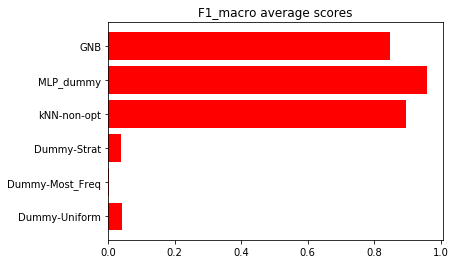

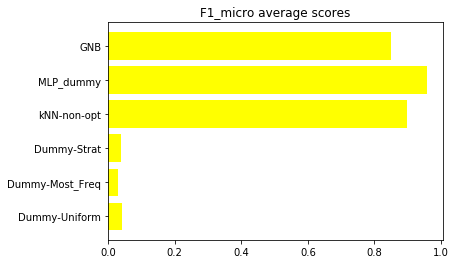

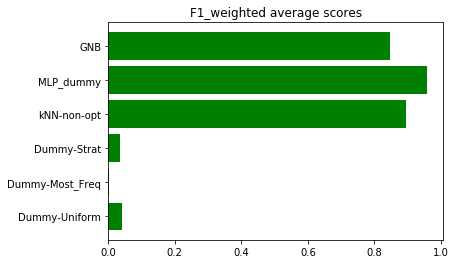

In [12]:
function(train,train_labels,test,test_labels)

Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$). $$P = \frac{T_p}{T_p+F_p}$$ Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$). $$R = \frac{T_p}{T_p + F_n}$$ Συχνά χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης. $$F1 = 2\frac{P \times R}{P+R}$$ Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. Στην οριακή περίπτωση του ταξινομητή που επιστρέφει σταθερά μόνο τη θετική κλάση, η ανάκληση θα είναι 1 ($F_n=0$) αλλά η ακρίβεια θα έχει τη μικρότερη δυνατή τιμή της. Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως.

Στην πράξη και ειδικά σε μη ισορροπημένα datasets χρησιμοποιούμε την ακρίβεια, ανάκληση και το F1 πιο συχνά από την πιστότητα.

Βλέπουμε ότι η MLP υπερτερεί των άλλων και μάλιστα βρίσκεται σε πολύ καλό σημείο από πλευράς accuracy,γεγονός αναμενόμενο λόγω και της πολυπλοκότητας του συγκεκριμένου ταξινομητή ως προς τη δομή του. Οι dummies από την άλλη πλευρά είναι αναμενόμενο ότι θα κινούνταν σε ιδιαίτερα χαμηλά επίπεδα δεδομένου του πλήθους των διαφορετικών κλάσεων του dataset. 

# Δ. Βελτιστοποίηση ταξινομητών

Θα εξετάσουμε μήπως μπορούμε να μειώσουμε τις διαστάσεις του dataset μέσω της επιλογής χαραχτηριστικών που έχουν μηδενικό είτε απειροελάχιστο variance οπότε δεν παίζουν κάποιο ρόλο στην απόφαση για το ποια θα είναι η πρόβλεψή μας.

In [13]:
from sklearn.feature_selection import VarianceThreshold
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
#print mask

print ('Το παλιό size του train dataset ήταν',train.shape,'. Μετά τη μείωση της διαστατικότητας αυτό είναι',train_reduced.shape)

# εφαρμόζουμε τις αντίστοιχες αλλαγές και στο test set
test_reduced = test[:,mask]
print ('Το παλιό size του test dataset ήταν',test.shape,'. Μετά τη μείωση της διαστατικότητας αυτό είναι',test_reduced.shape)



Το παλιό size του train dataset ήταν (5457, 617) . Μετά τη μείωση της διαστατικότητας αυτό είναι (5457, 617)
Το παλιό size του test dataset ήταν (2340, 617) . Μετά τη μείωση της διαστατικότητας αυτό είναι (2340, 617)


Διαπιστώνουμε ότι δεν πετυχαίνει η μείωση της διαστατικότητας μέσω αυτής της μεθόδου οπότε θα στηριχτούμε στην PCA που γίνεται κατά τη βελτιστοποίηση των ταξινομητών.

Για όλους του Dummy Classifiers δεν έχει νόημα να βρούμε βέλτιστες υπερπαραμέτρους για το pipeline, οπότε κάνουμε χρήση του pipeline με τις default παραμέτρους (δεν θα βρούμε βελτιστες με searchgridcv).

In [16]:
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import time

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = preprocessing.StandardScaler()
ros = RandomOverSampler()
pca = PCA()

dc_uni = DummyClassifier(strategy="uniform")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_uni)])

start_time = time.time()
pipe.fit(train_dummy,train_labels_dummy)
print("Για τον Dummy Classifier(uniform) : %s seconds" % (time.time() - start_time))

preds = pipe.predict(test_dummy)

#################
print ('Classification report for Dummy Classifier (uniform)')
cr_dummy_uni = classification_report(test_labels, preds)
print (cr_dummy_uni)

scores_micro = {}
scores_macro = {}

scores_micro['Dummy-Uniform']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['Dummy-Uniform']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for Dummy Classifier (uniform)')
print (confusion_matrix(test_labels, preds))

acc_dummy_uni = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_dummy_uni))

Για τον Dummy Classifier(uniform) : 1.8156580924987793 seconds
Classification report for Dummy Classifier (uniform)
              precision    recall  f1-score   support

         1.0       0.04      0.05      0.05        84
         2.0       0.04      0.04      0.04        95
         3.0       0.05      0.04      0.04       100
         4.0       0.07      0.08      0.07        91
         5.0       0.03      0.04      0.04        69
         6.0       0.03      0.03      0.03        90
         7.0       0.04      0.05      0.05        83
         8.0       0.05      0.06      0.05        87
         9.0       0.08      0.09      0.08        87
        10.0       0.07      0.08      0.07        90
        11.0       0.05      0.05      0.05        82
        12.0       0.06      0.06      0.06        88
        13.0       0.04      0.04      0.04        97
        14.0       0.06      0.06      0.06        99
        15.0       0.03      0.03      0.03        80
        16.0       

In [17]:
dc_freq = DummyClassifier(strategy="most_frequent")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_freq)])

start_time = time.time()
pipe.fit(train_dummy,train_labels_dummy)
print("Για τον Dummy Classifier(Most Frequent) : %s seconds" % (time.time() - start_time))

preds = pipe.predict(test_dummy)

#################
print ('Classification report for Dummy Classifier (most frequent)')
cr_dummy_const_p1 = classification_report(test_labels, preds)
print (cr_dummy_const_p1)

scores_micro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for Dummy Classifier (most frequent)')
print (confusion_matrix(test_labels, preds))

acc_dummy_freq = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_dummy_freq))

Για τον Dummy Classifier(Most Frequent) : 1.63983154296875 seconds
Classification report for Dummy Classifier (most frequent)
              precision    recall  f1-score   support

         1.0       0.04      1.00      0.07        84
         2.0       0.00      0.00      0.00        95
         3.0       0.00      0.00      0.00       100
         4.0       0.00      0.00      0.00        91
         5.0       0.00      0.00      0.00        69
         6.0       0.00      0.00      0.00        90
         7.0       0.00      0.00      0.00        83
         8.0       0.00      0.00      0.00        87
         9.0       0.00      0.00      0.00        87
        10.0       0.00      0.00      0.00        90
        11.0       0.00      0.00      0.00        82
        12.0       0.00      0.00      0.00        88
        13.0       0.00      0.00      0.00        97
        14.0       0.00      0.00      0.00        99
        15.0       0.00      0.00      0.00        80
        1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
dc_strat = DummyClassifier(strategy="stratified")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_strat)])

start_time = time.time()
pipe.fit(train_dummy,train_labels_dummy)
print("Για τον Dummy Classifier(Stratified) : %s seconds" % (time.time() - start_time))

preds = pipe.predict(test_dummy)

#################
print ('Classification report for Dummy Classifier (stratified)')
cr_dummy_strat = classification_report(test_labels, preds)
print (cr_dummy_strat)

scores_micro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['Dummy-Most_Freq']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for Dummy Classifier (stratified)')
print (confusion_matrix(test_labels, preds))

acc_dummy_strat = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_dummy_strat))

Για τον Dummy Classifier(Stratified) : 1.9720463752746582 seconds
Classification report for Dummy Classifier (stratified)
              precision    recall  f1-score   support

         1.0       0.01      0.01      0.01        84
         2.0       0.04      0.04      0.04        95
         3.0       0.03      0.03      0.03       100
         4.0       0.03      0.03      0.03        91
         5.0       0.02      0.03      0.02        69
         6.0       0.01      0.01      0.01        90
         7.0       0.02      0.02      0.02        83
         8.0       0.01      0.01      0.01        87
         9.0       0.04      0.05      0.04        87
        10.0       0.01      0.01      0.01        90
        11.0       0.04      0.05      0.05        82
        12.0       0.04      0.05      0.04        88
        13.0       0.08      0.07      0.07        97
        14.0       0.08      0.08      0.08        99
        15.0       0.03      0.04      0.03        80
        16.0 

Ουσιαστικά καμία απολύτως βελτίωση για τους dummy classifiers, ο αριθμός των κλάσεων δεν τους επέτρεξε να λειτουργήσουν.

Όπως στους dummy, ετσι και στον Naive Bayes Classifier θα δοκιμάσουμε τις default τιμές για το pipeline.

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])

start_time = time.time()
pipe.fit(train_dummy,train_labels_dummy)
print("Για τον Gaussian Naive Bayes: %s seconds" % (time.time() - start_time))

preds = pipe.predict(test)

#################
print ('Classification report for Gaussian Naive Bayes Classifier')
cr_gnb = classification_report(test_labels, preds)
print (cr_gnb)

scores_micro['GNB']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['GNB']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for Gaussian Naive Bayes Classifier')
print (confusion_matrix(test_labels, preds))

acc_gnb = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_gnb))

Για τον Gaussian Naive Bayes: 1.9278037548065186 seconds
Classification report for Gaussian Naive Bayes Classifier
              precision    recall  f1-score   support

         1.0       0.84      0.75      0.79        84
         2.0       0.76      0.75      0.76        95
         3.0       0.95      0.82      0.88       100
         4.0       0.96      0.73      0.83        91
         5.0       0.84      0.67      0.74        69
         6.0       0.90      0.90      0.90        90
         7.0       0.87      0.86      0.86        83
         8.0       0.93      0.94      0.94        87
         9.0       0.95      0.84      0.89        87
        10.0       0.99      0.81      0.89        90
        11.0       0.91      0.78      0.84        82
        12.0       0.97      0.84      0.90        88
        13.0       0.65      0.75      0.70        97
        14.0       0.80      0.66      0.72        99
        15.0       0.95      0.89      0.92        80
        16.0       0

Χαμηλά αποτελέσματα και για τον gnbc. Συνεχίζουμε με τον kNN τον οποίο θα επιχειρήσουμε να βελτιστοποιήσουμε μέσω gridsearch.

In [22]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

start_time = time.time()
pipe.fit(train, train_labels)
print("Για τον non-optimized kNN : %s seconds" % (time.time() - start_time))

preds = pipe.predict(test)


#################
print ('Classification report for non-optimized kNN')
cr_knn_no = classification_report(test_labels, preds)
print (cr_knn_no)

scores_micro['kNN-non-opt']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['kNN-non-opt']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for non-optimized kNN')
print (confusion_matrix(test_labels, preds))

acc_knn_no = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_knn_no))

Για τον non-optimized kNN : 1.9779775142669678 seconds
Classification report for non-optimized kNN
              precision    recall  f1-score   support

         1.0       0.89      0.90      0.90        84
         2.0       0.60      0.82      0.69        95
         3.0       0.88      0.95      0.91       100
         4.0       0.55      0.71      0.62        91
         5.0       0.92      0.65      0.76        69
         6.0       0.86      0.92      0.89        90
         7.0       0.76      0.88      0.82        83
         8.0       1.00      0.99      0.99        87
         9.0       1.00      0.97      0.98        87
        10.0       0.87      0.97      0.92        90
        11.0       0.88      0.87      0.87        82
        12.0       0.91      0.94      0.93        88
        13.0       0.74      0.75      0.75        97
        14.0       0.82      0.74      0.78        99
        15.0       0.93      0.97      0.95        80
        16.0       0.69      0.70   

Επιχειρούμε βελτιστοποίηση. Ξεκινάμε υπολογίζοντας τη διασπορά του δείγματος καθώς ενδέχεται να παίξει ρόλο στην επιλογή του v_threshold.

In [23]:
train_variance = train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.05657589 0.10317914 0.106779   0.0959123  0.21418516 0.32453442
 0.31188155 0.28697762 0.28188678 0.26532755 0.22931446 0.19714385
 0.20339876 0.22526384 0.2315474  0.23098169 0.20566921 0.17789607
 0.1547159  0.13892287 0.13208593 0.1359187  0.14701459 0.15427166
 0.15111764 0.148334   0.1487317  0.14764926 0.15209474 0.16474763
 0.18491009 0.21470754 0.04598692 0.0848028  0.0952609  0.08571354
 0.21025781 0.33308739 0.33826389 0.32471131 0.31266543 0.28697864
 0.24791497 0.21787527 0.21700228 0.23346832 0.2390233  0.23717964
 0.2133382  0.17646762 0.14162196 0.12171351 0.1171356  0.12346482
 0.13491073 0.14164622 0.14672977 0.14623792 0.14591016 0.14370909
 0.15059707 0.16328869 0.18597631 0.21917925 0.04475434 0.08622898
 0.10423025 0.08691158 0.20647887 0.33846992 0.35878362 0.34965963
 0.34611089 0.33101981 0.29360211 0.26117335 0.25407716 0.25847518
 0.25045781 0.24125884 0.21461927 0.18448904 0.15163604 0.12946094
 0.12793387 0.13805317 0.14749851 0.15165592 0.1533348  0.1519

Συμπεραίνουμε ότι λογικά θα χρειαστούμε v_threshold πολύ κοντά στο 0.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

### PREPROCESSING
vthreshold = [0,0.1]
n_components = [35,50,65,80]

### kNN specific
k_neighbors = [1,5,7,9,11,17]
metric =['euclidean']
weights =['uniform','distance']
verbose=10

clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = -1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

estimator_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,kNN__n_neighbors=k_neighbors,kNN__weights=weights,kNN__metric=metric),verbose=10,cv=5,scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_macro.fit(train, train_labels)
print("Για τον optimized kNN : %s seconds" % (time.time() - start_time))

preds = estimator_macro.predict(test)

#estimator_weighted = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,kNN__n_neighbors=k_neighbors,kNN__weights=weights,kNN__metric=metric), cv=5,scoring='f1_weighted', n_jobs=-1)
#estimator_weighted.fit(train, train_labels)
#preds_weighted = estimator_weighted.predict(test)

#################
print ('Classification report for optimized kNN')
cr_knn_opt = classification_report(test_labels, preds)
print (cr_knn_opt)

scores_micro['kNN-opt']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['kNN-opt']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for optimized kNN')
print (confusion_matrix(test_labels, preds))

acc_knn_opt = 100*accuracy_score(test_labels,preds)
print ('\nAccuracy percentage of this classifier is %.3f %%' % (acc_knn_opt))

# print best estimator configuration
print ('\nFor kNN the optimal configuration is :')
print (estimator_macro.best_estimator_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Για τον optimized kNN : 1226.2798564434052 seconds
Classification report for optimized kNN
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95        84
         2.0       0.73      0.88      0.80        95
         3.0       0.91      0.96      0.93       100
         4.0       0.79      0.87      0.83        91
         5.0       0.90      0.67      0.77        69
         6.0       0.89      0.98      0.93        90
         7.0       0.87      0.94      0.90        83
         8.0       1.00      0.99      0.99        87
         9.0       0.99      1.00      0.99        87
        10.0       0.89      0.99      0.94        90
        11.0       0.89      0.90      0.90        82
        12.0       0.96      0.97      0.96        88
        13.0       0.75      0.82      0.78        97
        14.0       0.85      0.72      0.78        99
        15.0       0.96      0.97      0.97        80
        16.0       0.77      0.84      0.80 

Φαίνεται να υπάρχει βελτίωση της τάξης του 5 με 6%, αρκετά ικανοποιητικός αριθμός. Έγιναν δοκιμές για διαφορετικές τιμές διαφόρων παραμέτρων αλλά αυτός φαίνεται να είναι ο αποδοτικότερος συνδυασμός, αν και κάπως χρονοβόρος.

Επόμενο βήμα η απόπειρα βελτιστοποίησης του mlp classifier.

In [26]:
clf = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf)])

### PREPROCESSING
vthreshold = [0]
n_components = [600]#,50,200,300,500,600]

### MLP specific
so = ['lbfgs']
al = [10**float(c) for c in np.arange(-7,-6)]
hd = [45]#, 25,45]
mi = [900]#,400,500,600,1000,800]
lr = ['constant','invscaling','adaptive']
ac = ['identity','logistic','tanh','relu']

estimator_macro = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,mlp__solver=so, mlp__alpha=al,mlp__hidden_layer_sizes=hd,mlp__max_iter=mi,mlp__learning_rate=lr,mlp__activation=ac),cv=5,scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_macro.fit(train, train_labels)
print("Για τον optimized MLP : %s seconds" % (time.time() - start_time))

preds = estimator_macro.predict(test)

#estimator_weighted = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,mlp__solver=so, mlp__alpha=al,mlp__hidden_layer_sizes=hd,mlp__max_iter=mi), cv=5,scoring='f1_weighted', n_jobs=-1)
#estimator_weighted.fit(train, train_labels)
#preds_weighted = estimator_weighted.predict(test)

#################
print ('Classification report for optimized MLP')
cr_mlp_opt = classification_report(test_labels, preds)
print (cr_mlp_opt)

scores_micro['MLP-opt']=precision_recall_fscore_support(test_labels,preds,average='micro')
scores_macro['MLP-opt']=precision_recall_fscore_support(test_labels,preds,average='macro')

print ('Confusion Matrix for optimized MLP')
print (confusion_matrix(test_labels, preds))

acc_mlp_opt = 100*accuracy_score(test_labels,preds)
print ('Accuracy percentage of this classifier is %.3f %%' % (acc_mlp_opt))

print ('\nFor MLP the optimal configuration is :')
print (estimator_macro.best_estimator_)

Για τον optimized MLP : 214.35696291923523 seconds
Classification report for optimized MLP
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99        84
         2.0       0.88      0.92      0.90        95
         3.0       0.95      0.99      0.97       100
         4.0       0.87      0.90      0.89        91
         5.0       0.92      0.86      0.89        69
         6.0       0.95      0.92      0.94        90
         7.0       0.92      0.94      0.93        83
         8.0       1.00      0.99      0.99        87
         9.0       0.99      1.00      0.99        87
        10.0       0.98      0.96      0.97        90
        11.0       0.94      0.98      0.96        82
        12.0       0.96      0.92      0.94        88
        13.0       0.92      0.91      0.91        97
        14.0       0.96      0.90      0.93        99
        15.0       0.92      0.99      0.95        80
        16.0       0.94      0.90      0.92 

Ο mlp ηταν αρκετά ψηλά σε accuracy και δεν πετύχαμε καμία βελτιστοποίηση, πιθανώς λόγω τυχαιότητας να προέρχεται η μικρή διαφορά που έχει πριν και μετά τη βελτιστοποίηση. Ακολουθούν τα διαγράμματα που ζητούνται βάσει των f1_micro και f1_macro, καθώς και πίνακας απόδοσης των ταξινομητών πριν και μετά τη βελτιστοποίηση.

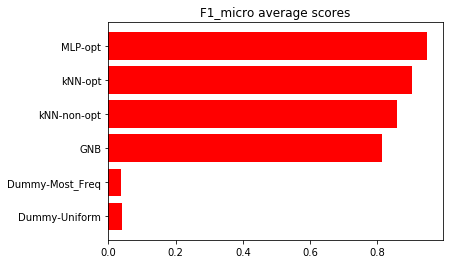

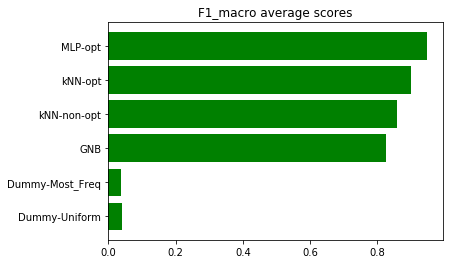

In [28]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

f1_scores_micro = [item[2] for item in scores_micro.values()]
f1_scores_macro = [item[2] for item in scores_macro.values()]

y_pos = np.arange(len(f1_scores_micro))
plt.barh(y_pos, f1_scores_micro, align='center',color='red')
plt.yticks(y_pos, scores_micro.keys())
plt.title('F1_micro average scores')
plt.show()

y_pos = np.arange(len(f1_scores_macro))
plt.barh(y_pos, f1_scores_macro, align='center',color='green')
plt.yticks(y_pos, scores_macro.keys())
plt.title('F1_macro average scores')
plt.show()

Παρακάτω παρουσιάζονται οι πίνακες με τα συγκριτικά αποτελέσματα της απόδοσης των ταξινομητών πριν και μετά τη βελτιστοποίηση (μεταβολή του accuracy).

In [30]:
x= {'%DummyUni': [4.231-4.188], '%DummyMostFreq': [3.590-2.949],'%DummyStrat': [3.889-3.761],'%GNBC':[81.325-84.957],'%kNN':[90.128-85.769],'%MLP':[94.744- 95.812]}
df1 = pd.DataFrame(data=x)
df1

,%DummyUni,%DummyMostFreq,%DummyStrat,%GNBC,%kNN,%MLP
0,0.043,0.641,0.128,-3.632,4.359,-1.068


Συμπερασματικά, βλέπουμε ότι σημαντική βελτίωση είχαμε στον ταξινομητή kNN ενώ ο GNBC δεν βελτιστοποιήθηκε αλλά αντιθέτως μειώθηκε το accuracy του. Συνολικά, όπως φαίνεται και από τα f1_micro και f1_macro scores ο πιο αξιόπιστος ταξινομητής για το dataset μας είναι ο MLP ο οποίος, παρ΄όλο που δεν πετύχαμε κάποια βελτίωση κινείται σε αρκετά υψηλά επίπεδα. Μικρές διαφορές πριν και μετά τη βελτιστοποίηση είναι πιθανό να οφείλονται και σε ένα παράγοντα τυχαιότητας που εμπεριέχει ο υπολογισμός των βέλτιστων υπερπαραμέτρων αλλά και η εκτέλεση των ταξινομητών.